## The `caption` module

This document reviews the `caption` module - which takes as input an image and returns a text description of the input image.  Output data is returned as a json.

A table of contents for the remainder of this document is shown below.

- [pipeline setup](#pipeline-setup)
- [required input format](#required-input-format)
- [using the default model](#using-the-default-model)
- [using a non-default model](#using-a-non-default-model)

In [1]:
# import utilities
import sys
import json
import importlib

sys.path.append("../../")
reset = importlib.import_module("utilities.reset")
reset_pipeline = reset.reset_pipeline

# load secrets from a .env file using python-dotenv
from dotenv import load_dotenv
import os

load_dotenv("../../.env")
MY_API_KEY = os.getenv("MY_API_KEY")
MY_API_URL = os.getenv("MY_API_URL")

# import krixik and initialize it with your personal secrets
from krixik import krixik

krixik.init(api_key=MY_API_KEY, api_url=MY_API_URL)

## Pipeline setup

Below we setup a simple one module pipeline using the `caption` module.  

We do this by passing the module name to the `module_chain` argument of [`create_pipeline`](system/create_save_load.md) along with a name for our pipeline.

In [4]:
# create a pipeline with a single module
pipeline = krixik.create_pipeline(name="module-caption-docs", module_chain=["caption"])

The `caption` module comes with a subset of popular caption models including the following:

- [vit-gpt2-image-captioning](https://huggingface.co/nlpconnect/vit-gpt2-image-captioning) (default)
- [git-base](https://huggingface.co/microsoft/git-base)
- [blip-image-captioning-base](https://huggingface.co/Salesforce/blip-image-captioning-base)
- [blip-image-captioning-large](https://huggingface.co/Salesforce/blip-image-captioning-large)

These available modeling options and parameters are stored in your custom [pipeline's configuration](system/create_save_load.md).

In [6]:
# delete all processed datapoints belonging to this pipeline
reset_pipeline(pipeline)

## Required input format

The `caption` module accepts `.png`, `.jpg`, and `.jpeg` images as input.

Lets take a quick look at a valid input file - and then process it.

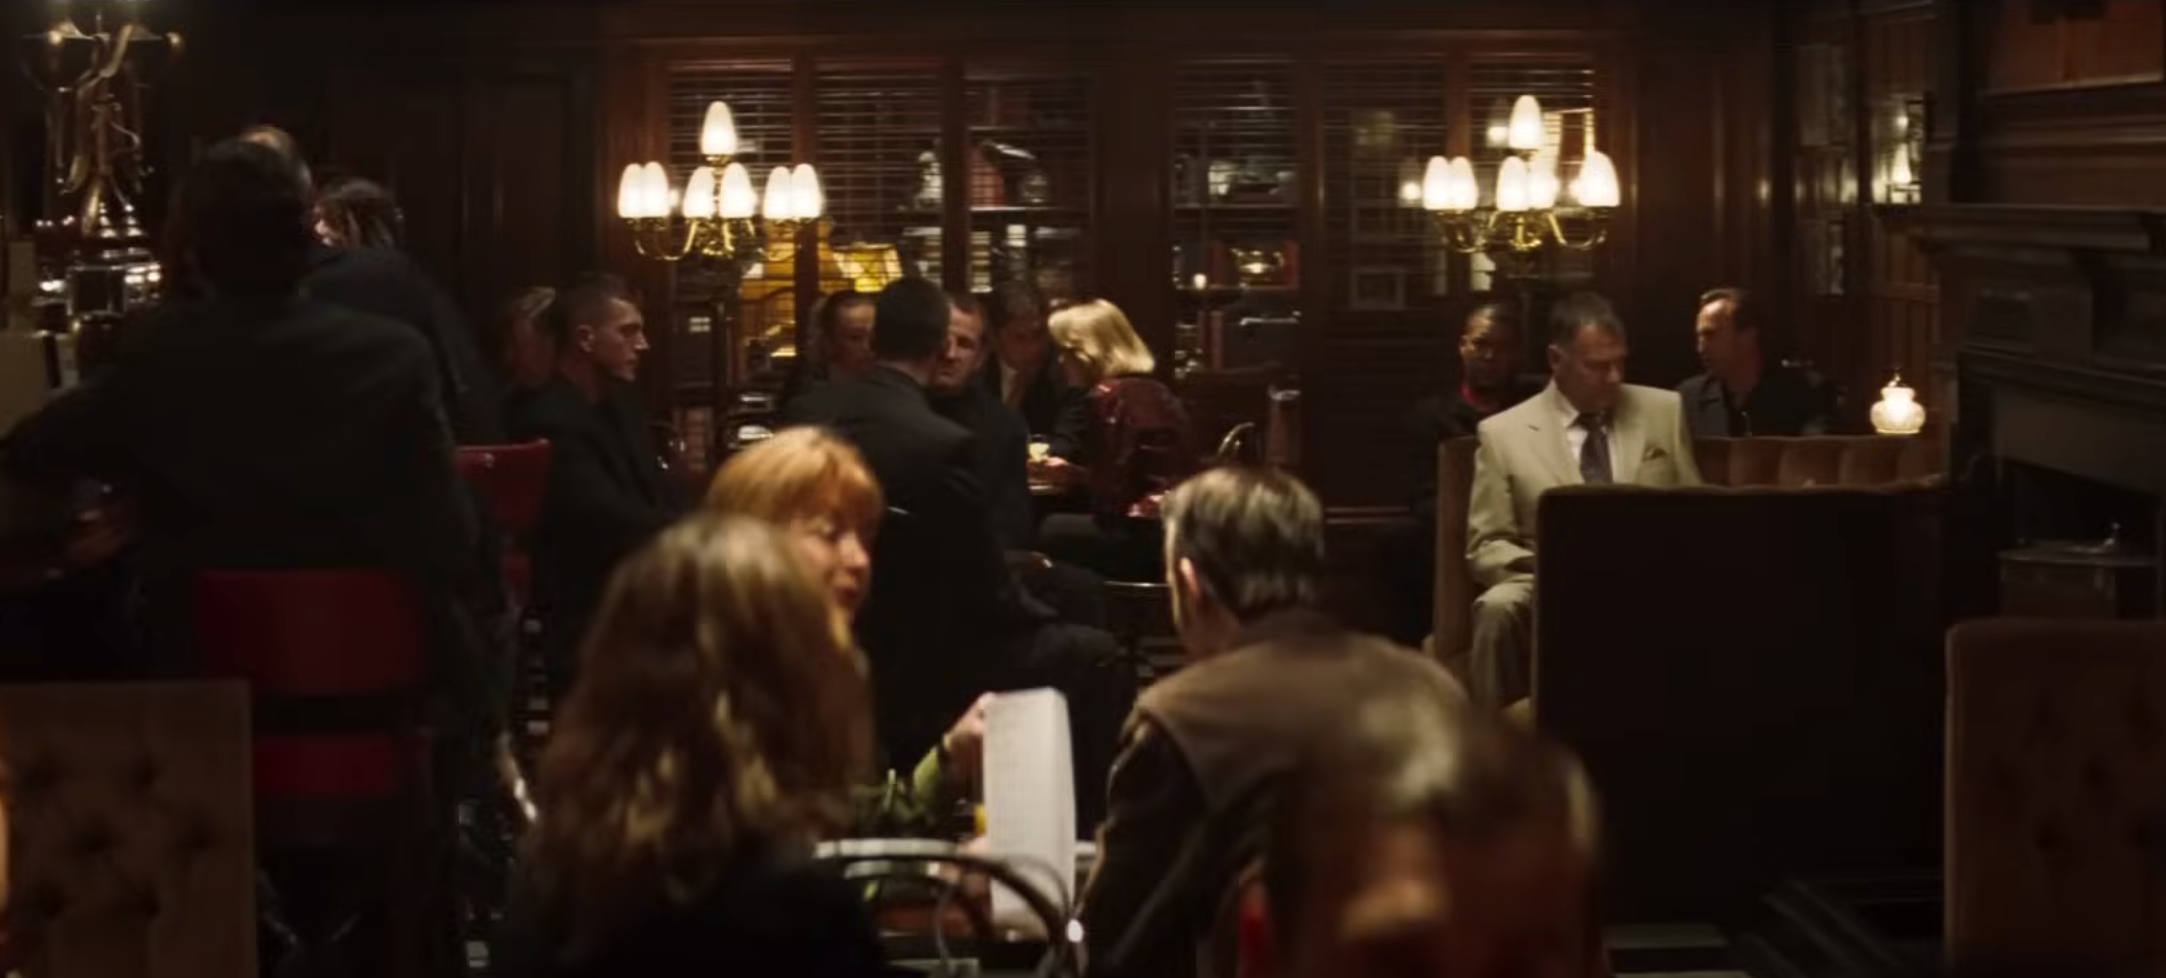

In [1]:
# examine contents of a valid input file
test_file = "../../data/input/resturant.png"
from IPython.display import Image
Image(filename=test_file)

## Using the default model

Let's process our test input file using the `default` model - `vit-gpt2-image-captioning`.  Because this is the default model we need not input the optional `modules` argument into `.process`.

In [8]:
# define path to an input file
test_file = "../../data/input/resturant.png"

# process for search
process_output = pipeline.process(
    local_file_path=test_file,
    local_save_directory="../../data/output",  # save output repo data output subdir
    expire_time=60 * 10,  # set all process data to expire in 10 minutes
    wait_for_process=True,  # wait for process to complete before regaining ide
    verbose=False,
)  # set verbosity to False

The output of this process is printed below.  Because the output of this particular module-model pair is json, the process output is provided in this object as well.  The output file itself has been returned to the address noted in the `process_output_files` key.  The `file_id` of the processed input is used as a filename prefix for the output file.

In [9]:
# nicely print the output of this process
print(json.dumps(process_output, indent=2))

{
  "status_code": 200,
  "pipeline": "my-caption-pipeline",
  "request_id": "9ff3d53c-9e0b-4c44-8ff2-b13f522c1739",
  "file_id": "8d770623-1aff-4c6e-866c-ede6d50a273c",
  "message": "SUCCESS - output fetched for file_id 8d770623-1aff-4c6e-866c-ede6d50a273c.Output saved to location(s) listed in process_output_files.",
  "warnings": [],
  "process_output": [
    {
      "caption": "a large group of people are in a restaurant"
    }
  ],
  "process_output_files": [
    "../../data/output/8d770623-1aff-4c6e-866c-ede6d50a273c.json"
  ]
}


We load in the text file output from `process_output_files` below. 

In [10]:
# load in process output from file
with open(process_output["process_output_files"][0]) as f:
    print(json.dumps(json.load(f), indent=2))

[
  {
    "caption": "a large group of people are in a restaurant"
  }
]


## Using a non-default model

To use a non-default model like `blip-image-captioning-base` we enter it explicitly as a `modules` selection when invoking `.process`.

In [11]:
# define path to an input file
test_file = "../../data/input/resturant.png"

# process for search
process_output = pipeline.process(
    local_file_path=test_file,
    local_save_directory="../../data/output",  # save output repo data output subdir
    expire_time=60 * 10,  # set all process data to expire in 10 minutes
    wait_for_process=True,  # wait for process to complete before regaining ide
    verbose=False,  # set verbosity to False
    modules={"caption": {"model": "blip-image-captioning-base"}},
)

The output of this process is printed below.  

Because the output of this particular module-model pair is json, the process output is provided in this object as well.  The output file itself has been returned to the address noted in the `process_output_files` key.  The `file_id` of the processed input is used as a filename prefix for the output file.

In [12]:
# nicely print the output of this process
print(json.dumps(process_output, indent=2))

{
  "status_code": 200,
  "pipeline": "my-caption-pipeline",
  "request_id": "ad19af14-730e-4048-8e97-866cf4984e9f",
  "file_id": "bd050d31-b3e0-4ecb-abaa-ff354143941d",
  "message": "SUCCESS - output fetched for file_id bd050d31-b3e0-4ecb-abaa-ff354143941d.Output saved to location(s) listed in process_output_files.",
  "warnings": [],
  "process_output": [
    {
      "caption": "a group of people sitting around a bar"
    }
  ],
  "process_output_files": [
    "../../data/output/bd050d31-b3e0-4ecb-abaa-ff354143941d.json"
  ]
}


In [13]:
# delete all processed datapoints belonging to this pipeline
reset_pipeline(pipeline)